# ANÁLISIS E INSIGHTS

Esta es la componente más importante del estudio, en donde se intentará obtener conclusiones relevantes para el objetivo utilizando todo el trabajo de preparación realizado.

Para ello se comienza dando respuesta a las preguntas semilla y es probable que en el proceso vayan surgiendo hallazgos interesantes que lleven a nuevas preguntas o a la aplicación de ciertas técnicas.

## IMPORTE DE LIBRERÍAS

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sqlalchemy as sa
import matplotlib.pyplot as plt

%matplotlib inline
%config IPCompleter.greedy = True
pd.options.display.max_columns = None

## CARGA DE DATOS

In [3]:
con = sa.create_engine('sqlite:///../Datos/AIRBNB.db')

df = pd.read_sql('df_preparado', con = con)
df.head(5)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,ocupacion,ingreso_anual_estimado,bedrooms_discretizadas,accommodates_discretizadas,beds_discretizadas,reviews_discretizadas,m2,precio_compra,roi_en_%,pdi_sol
0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.0,5,1,22,t,2,1.0,1.0,106,4.88,4.86,4.84,5863,Chamartín,343,29155.0,01_Una,0-3,0-2,73-994,50,205205.0,14.207743,5.032039
1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.0,5,3,0,f,2,1.0,2.0,172,4.63,4.78,4.90,5877,Centro,365,23725.0,01_Una,0-3,0-2,73-994,50,205695.0,11.534067,0.230175
2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,2,135,f,1,1.0,1.0,33,4.58,4.82,4.21,2592,Latina,230,7130.0,01_Una,0-3,0-2,14-72,50,90720.0,7.859347,3.521406
3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.0,5,1,168,f,3,1.0,1.0,33,4.91,4.97,5.00,5877,Centro,197,18518.0,01_Una,0-3,0-2,14-72,50,205695.0,9.002650,0.591065
4,26825,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29.0,3,1,295,t,1,1.0,1.0,196,4.72,4.72,4.73,4524,Arganzuela,70,2030.0,01_Una,0-3,0-2,73-994,50,158340.0,1.282051,3.200942


## ANÁLISIS

### ANÁLISIS SOBRE LOS PRECIOS

Para el caso de estudio se procede a analizar la variable del ingreso anual estimado para las cuales se procede a resolver las siguientes interrogantes:

* Precio Medio
* Rango de precios
* Precios por Distrito
* Precios por Barrio
* Ranking de precios por distrito y barrio

In [4]:
df.sort_values(by = 'ingreso_anual_estimado', ascending = False)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,ocupacion,ingreso_anual_estimado,bedrooms_discretizadas,accommodates_discretizadas,beds_discretizadas,reviews_discretizadas,m2,precio_compra,roi_en_%,pdi_sol
7039,44305807,Rental unit in Madrid · 1 bedroom · 1 bath,290977158,Arganzuela,Imperial,40.406730,-3.717570,Entire home/apt,8469.0,40,1,90,f,1,1.0,1.0,0,NaN,NaN,NaN,4524,Arganzuela,275,2328975.0,01_Una,0-3,0-2,0-13,50,158340.0,1470.869648,1.639864
5269,35149419,Chalet in Madrid · 4 bedrooms · 5 beds · 2 baths,143732655,San Blas - Canillejas,Canillejas,40.449370,-3.616330,Entire home/apt,6000.0,1,1,0,f,6,3.0,5.0,0,NaN,NaN,NaN,2852,San Blas - Canillejas,365,2190000.0,03_Tres,5-16,3-40,0-13,90,179676.0,1218.860616,8.212429
5128,34902185,Rental unit in Madrid · 2 bedrooms · 5 beds · ...,263056374,Arganzuela,Acacias,40.401300,-3.713180,Entire home/apt,5000.0,1,1,0,f,7,3.0,5.0,0,NaN,NaN,NaN,4524,Arganzuela,365,1825000.0,03_Tres,5-16,3-40,0-13,90,285012.0,640.323916,1.907685
5005,34826962,Rental unit in Madrid · 2 bedrooms · 3 beds · ...,222068421,San Blas - Canillejas,Arcos,40.419270,-3.615550,Private room,3000.0,1,1,0,f,4,2.0,3.0,0,NaN,NaN,NaN,2852,San Blas - Canillejas,365,1533000.0,02_Dos,4,3,0-13,70,139748.0,1096.974554,7.439364
12557,732501576259430953,Hostel in Madrid · ★4.13 · 1 bedroom · 2 beds ...,10377422,Centro,Cortes,40.413880,-3.697700,Private room,3600.0,1,4,0,f,3,1.0,2.0,8,4.13,4.00,4.50,5877,Centro,365,1314000.0,01_Una,0-3,0-2,0-13,50,205695.0,638.809888,0.573013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12915,758770839663003339,Home in Madrid · ★4.50 · 1 bedroom · 2 beds · ...,901218,Centro,Sol,40.418045,-3.708233,Private room,94.0,1,46,365,f,2,1.0,2.0,8,4.50,4.63,5.00,5877,Centro,0,0.0,01_Una,0-3,0-2,0-13,50,205695.0,0.000000,0.439608
9991,587125925844133961,Rental unit in Madrid · 1 bedroom · 1 bed · 1 ...,430470667,Salamanca,Recoletos,40.421635,-3.689370,Entire home/apt,400.0,2,1,365,f,3,1.0,1.0,0,NaN,NaN,NaN,7044,Salamanca,0,0.0,01_Una,0-3,0-2,0-13,50,246540.0,0.000000,1.302711
12912,754925240369580472,Rental unit in Madrid · 3 bedrooms · 1 bed · 3...,2987457,Tetuán,Castillejos,40.457730,-3.697940,Private room,80.0,1,14,365,t,2,1.0,1.0,2,5.00,5.00,5.00,4175,Tetuán,0,0.0,01_Una,0-3,0-2,0-13,50,146125.0,0.000000,4.583368
800,5962564,Loft in Madrid · ★4.23 · 1 bedroom · 2 beds · ...,5542111,Centro,Universidad,40.424095,-3.709137,Entire home/apt,131.0,1,38,365,f,4,1.0,2.0,256,4.23,4.69,4.85,5877,Centro,0,0.0,01_Una,4,0-2,73-994,50,205695.0,0.000000,0.955263


In [5]:
df.ingreso_anual_estimado.describe()

count    2.139500e+04
mean     2.492167e+04
std      5.400476e+04
min      0.000000e+00
25%      4.433000e+03
50%      1.396900e+04
75%      2.920000e+04
max      2.328975e+06
Name: ingreso_anual_estimado, dtype: float64

Se puede apreciar al menos un atípico por la parte de arriba que sesga la media, por tanto se usará la mediana como medida de centralización más fiable.

In [6]:
df.groupby('neighbourhood_group').ingreso_anual_estimado.median().sort_values(ascending=False)

neighbourhood_group
Salamanca                18761.0
Centro                   17980.0
Retiro                   15540.0
Arganzuela               13870.0
Chamartín                13870.0
Chamberí                 13700.0
Moncloa - Aravaca        13528.0
San Blas - Canillejas    13057.0
Barajas                  12811.5
Hortaleza                12467.0
Ciudad Lineal            10677.5
Tetuán                   10528.0
Fuencarral - El Pardo     9620.0
Moratalaz                 9396.0
Carabanchel               9321.5
Villa de Vallecas         8910.0
Villaverde                8410.0
Latina                    8352.0
Vicálvaro                 8272.0
Puente de Vallecas        8118.0
Usera                     7370.0
Name: ingreso_anual_estimado, dtype: float64

In [7]:
temp = df.groupby('neighbourhood_group')[['ingreso_anual_estimado', 'precio_compra','roi_en_%']].median()\
       .sort_values('roi_en_%', ascending=False)
temp

,ingreso_anual_estimado,precio_compra,roi_en_%
neighbourhood_group,,,
San Blas - Canillejas,13057.0,99820.0,12.481037
Villaverde,8410.0,68705.0,10.989254
Puente de Vallecas,8118.0,79170.0,9.902741
Barajas,12811.5,119210.0,9.797836
Carabanchel,9321.5,90020.0,9.777827
Moratalaz,9396.0,97895.0,9.315593
Villa de Vallecas,8910.0,94185.0,8.917556
Usera,7370.0,80290.0,8.877818
Latina,8352.0,90720.0,8.839286


Llama la atención el dato de San Blas, que al no estar en las zonas más relevantes de Madrid (financieramente hablando) muestra una gran tasa de retorno a la inversión. Se deja anotada esta particularidad a la espera de encontrar posibles causantes de la misma.

In [8]:
sns.set(style="darkgrid")

C:\Users\santi\AppData\Local\Temp\ipykernel_37208\1505923584.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temp.precio_compra[cada],temp.ingreso_anual_estimado[cada], temp.index[cada]);


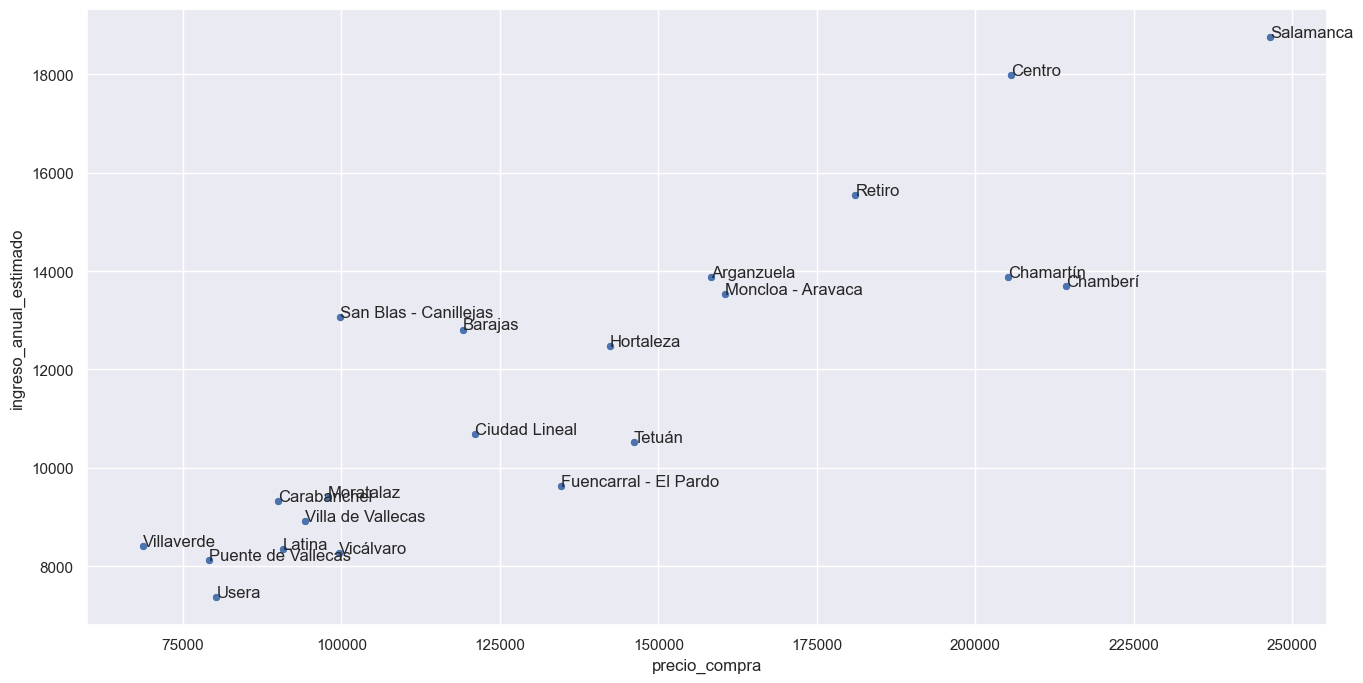

In [9]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=temp, x='precio_compra', y='ingreso_anual_estimado')

for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada],temp.ingreso_anual_estimado[cada], temp.index[cada]);

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Por tanto como era esperable NO se encuentra ninguna particularidad clara a este nivel.

Se procede a repetir el análisis a nivel de barrio a ver si se observan patrones interesantes.

In [10]:
temp_1 = df.groupby('neighbourhood')[['ingreso_anual_estimado', 'precio_compra','roi_en_%']].median()\
       .sort_values('roi_en_%', ascending=False)

temp_1.head(30)

,ingreso_anual_estimado,precio_compra,roi_en_%
neighbourhood,,,
Rosas,18448.5,99820.0,17.940865
El Goloso,23885.0,134575.0,17.748467
San Cristobal,14235.0,68705.0,14.991631
Simancas,16038.0,99820.0,14.626327
San Andrés,9758.0,68705.0,14.202751
San Fermín,11340.0,80290.0,13.513514
El Viso,27018.0,205205.0,13.166346
Salvador,13759.2,99820.0,13.073532
Colina,16440.0,121065.0,12.913960


C:\Users\santi\AppData\Local\Temp\ipykernel_37208\659284121.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temp_1.precio_compra[cada], temp_1.ingreso_anual_estimado[cada], temp_1.index[cada]);


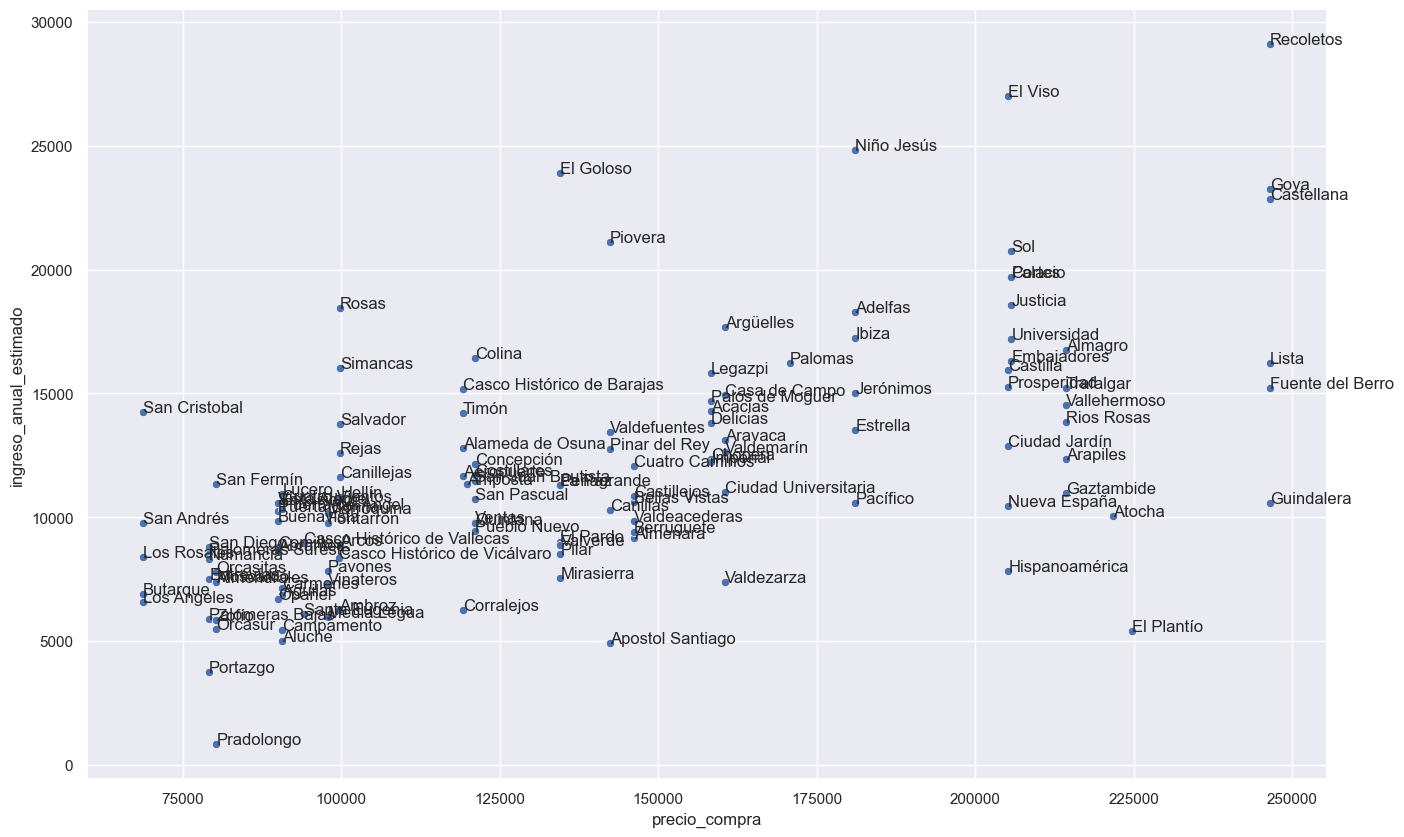

In [11]:
plt.figure(figsize = (16,10))
sns.scatterplot(data = temp_1, x = 'precio_compra', y = 'ingreso_anual_estimado')

for cada in range(0, temp_1.shape[0]):
    plt.text(temp_1.precio_compra[cada], temp_1.ingreso_anual_estimado[cada], temp_1.index[cada]);

A este nivel se pueden apreciar más particularidades:

* Dentro de cada grupo de bajo-medio-medio alto-alto sí podemos empezar a identificar las zonas con mayor tasa de retorno anual:
  
    * Bajo: Rosas, Simancas, San Cristobal, San Andrés
    * Medio: Colinas, Casco Histórico de Barajas
    * Medio-alto: El Coloso, Piovera
    * Alto: El Viso, Niño Jesús, Recoletos
    
**Insight 1: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

In [12]:
df.filter(like = 'discretizadas')

,bedrooms_discretizadas,accommodates_discretizadas,beds_discretizadas,reviews_discretizadas
0,01_Una,0-3,0-2,73-994
1,01_Una,0-3,0-2,73-994
2,01_Una,0-3,0-2,14-72
3,01_Una,0-3,0-2,14-72
4,01_Una,0-3,0-2,73-994
...,...,...,...,...
21390,02_Dos,4,3,0-13
21391,01_Una,0-3,0-2,0-13
21392,01_Una,0-3,0-2,0-13
21393,02_Dos,4,3-40,0-13


**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

Para responder esta interrogante se procede a emplear el método del minicubo con las variables discretizadas del análisis.

In [13]:
metricas = ['ingreso_anual_estimado', 'precio_compra', 'roi_en_%']
dimensiones = ['bedrooms_discretizadas', 'accommodates_discretizadas', 'beds_discretizadas']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_discretizadas,accommodates_discretizadas,beds_discretizadas,ingreso_anual_estimado,precio_compra,roi_en_%
0,01_Una,0-3,0-2,29155.0,205205.0,14.207743
1,01_Una,0-3,0-2,23725.0,205695.0,11.534067
2,01_Una,0-3,0-2,7130.0,90720.0,7.859347
3,01_Una,0-3,0-2,18518.0,205695.0,9.002650
4,01_Una,0-3,0-2,2030.0,158340.0,1.282051
...,...,...,...,...,...,...
21390,02_Dos,4,3,7440.0,112406.0,6.618864
21391,01_Una,0-3,0-2,21120.0,246540.0,8.566561
21392,01_Una,0-3,0-2,8037.0,146125.0,5.500086
21393,02_Dos,4,3-40,2886.0,300076.0,0.961756


In [14]:
minicubo_precio = minicubo_precio.melt(id_vars = metricas)
minicubo_precio

,ingreso_anual_estimado,precio_compra,roi_en_%,variable,value
0,29155.0,205205.0,14.207743,bedrooms_discretizadas,01_Una
1,23725.0,205695.0,11.534067,bedrooms_discretizadas,01_Una
2,7130.0,90720.0,7.859347,bedrooms_discretizadas,01_Una
3,18518.0,205695.0,9.002650,bedrooms_discretizadas,01_Una
4,2030.0,158340.0,1.282051,bedrooms_discretizadas,01_Una
...,...,...,...,...,...
64180,7440.0,112406.0,6.618864,beds_discretizadas,3
64181,21120.0,246540.0,8.566561,beds_discretizadas,0-2
64182,8037.0,146125.0,5.500086,beds_discretizadas,0-2
64183,2886.0,300076.0,0.961756,beds_discretizadas,3-40


In [15]:
minicubo_precio = minicubo_precio.groupby(['variable', 'value'])[['ingreso_anual_estimado','precio_compra','roi_en_%']].agg('median')
minicubo_precio

ingreso_anual_estimado  precio_compra  \
variable                   value                                              
accommodates_discretizadas 0-3                       10890.0       205695.0   
                           4                         19173.0       205695.0   
                           5-16                      28233.5       287973.0   
bedrooms_discretizadas     01_Una                    11775.0       205695.0   
                           02_Dos                    24734.0       287973.0   
                           03_Tres                   32896.0       370251.0   
                           04_Cuatro                 36532.0       617085.0   
beds_discretizadas         0-2                       11775.0       205695.0   
                           3                         24455.0       287973.0   
                           3-40                      28272.0       287973.0   

                                       roi_en_%  
variable                   value                 
accommodates_discretizadas 0-3         6.682028  
                           4           9.762756  
                           5-16       10.549224  
bedrooms_discretizadas     01_Una      7.292547  
                           02_Dos      9.830850  
                           03_Tres    10.229410  
                           04_Cuatro   6.807689  
beds_discretizadas         0-2         7.292547  
                           3           9.696791  
                           3-40        9.749872

In [16]:
minicubo_precio.loc['bedrooms_discretizadas']

,ingreso_anual_estimado,precio_compra,roi_en_%
value,,,
01_Una,11775.0,205695.0,7.292547
02_Dos,24734.0,287973.0,9.830850
03_Tres,32896.0,370251.0,10.229410
04_Cuatro,36532.0,617085.0,6.807689


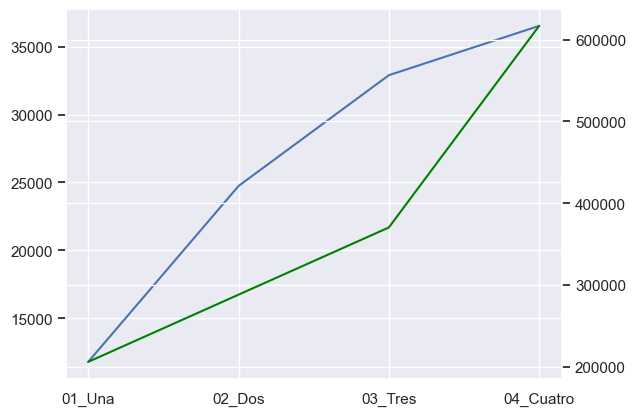

In [17]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_discretizadas'].ingreso_anual_estimado)
ax1 = ax.twinx()
ax1.plot(minicubo_precio.loc['bedrooms_discretizadas'].precio_compra, color = 'green');

En cuanto al número de habitaciones no hay nada que destacar.

Existe una relación casi perfecta entre el precio de compra y el precio total que se puede cobrar.

Parte de este efecto puede ser artificial, ya que se uso el número de habitaciones para calcular el ingreso anual como el precio de compra.

In [18]:
minicubo_precio.loc['beds_discretizadas']

,ingreso_anual_estimado,precio_compra,roi_en_%
value,,,
0-2,11775.0,205695.0,7.292547
3,24455.0,287973.0,9.696791
3-40,28272.0,287973.0,9.749872


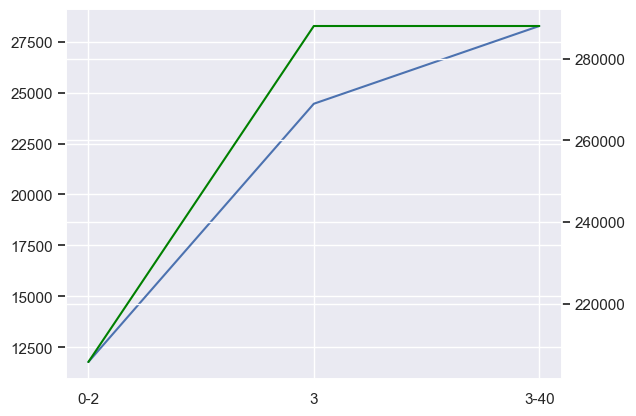

In [19]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_discretizadas'].ingreso_anual_estimado)
ax1 = ax.twinx()
ax1.plot(minicubo_precio.loc['beds_discretizadas'].precio_compra, color = 'green');

En cuanto al número de camas sí hay una conclusión:

**Insight 2: el número de camas deseado es mayor a 3**. Este tipo de inmueble con mayor número de camas representan un incremento en el ingreso sin aumentar el precio de compra del inmueble.

Dado que no había este efecto en el número de habitaciones ¿podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso?

Veámoslo por ejemplo con los pisos de una habitación:

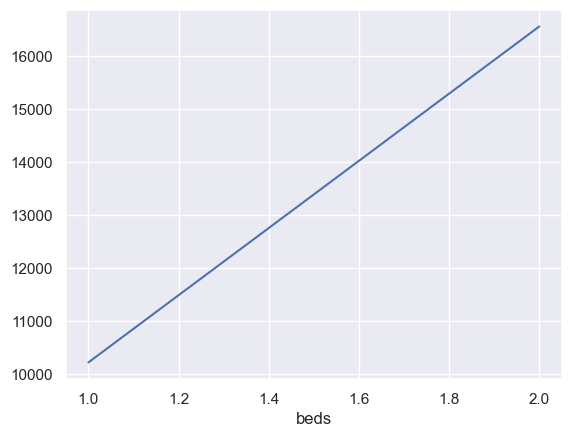

In [20]:
df[df.bedrooms == 1].groupby('beds').ingreso_anual_estimado.median().plot();

No se contempla un comportamiento extraño, se aprecia que en inmuebles de 1 habitación existe hasta un máximo de 2 camas.

In [21]:
minicubo_precio.loc['accommodates_discretizadas']

,ingreso_anual_estimado,precio_compra,roi_en_%
value,,,
0-3,10890.0,205695.0,6.682028
4,19173.0,205695.0,9.762756
5-16,28233.5,287973.0,10.549224


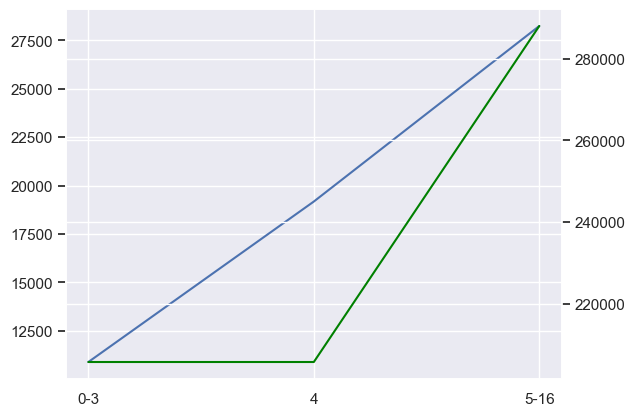

In [22]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_discretizadas'].ingreso_anual_estimado)
ax1 = ax.twinx()
ax1.plot(minicubo_precio.loc['accommodates_discretizadas'].precio_compra, color = 'green');

**Insight 3: el número óptimo de huéspedes está en 4, ya el precio de los inmuebles para acomodar 0 a 3 personas es el mismo que para acomodar 4. A partir de 4 el piso necesita ser mayor y el precio de compra se incrementa bastante**

Por último se analizará la variable que hemos construído de cercanía a un punto de interés para ver si tiene efecto sobre el precio de las habitaciones.

En una situación real se necesita evaluar con muchos puntos de este estilo.

En este caso como se ha construído la distancia a la Puerta del Sol y se procede a evaluar solo los distritos para lo que esto puede ser relevante, es decir los más céntricos.

Para ello es necesario calcular la distancia media por distrito y elegir un punto de corte.

In [23]:
df.groupby('distrito').pdi_sol.median().sort_values()

distrito
Centro                    0.719961
Arganzuela                1.794493
Chamberí                  2.056675
Moncloa - Aravaca         2.114622
Retiro                    2.449518
Salamanca                 2.827297
Latina                    3.318384
Carabanchel               3.491066
Usera                     3.783360
Puente de Vallecas        4.279675
Chamartín                 4.505958
Tetuán                    4.663274
Moratalaz                 5.000908
Ciudad Lineal             5.142403
Villaverde                7.529505
Fuencarral - El Pardo     7.570351
Hortaleza                 7.945373
San Blas - Canillejas     8.076985
Vicálvaro                 8.691357
Villa de Vallecas         8.828834
Barajas                  11.573973
Name: pdi_sol, dtype: float64

In [24]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()
seleccion

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

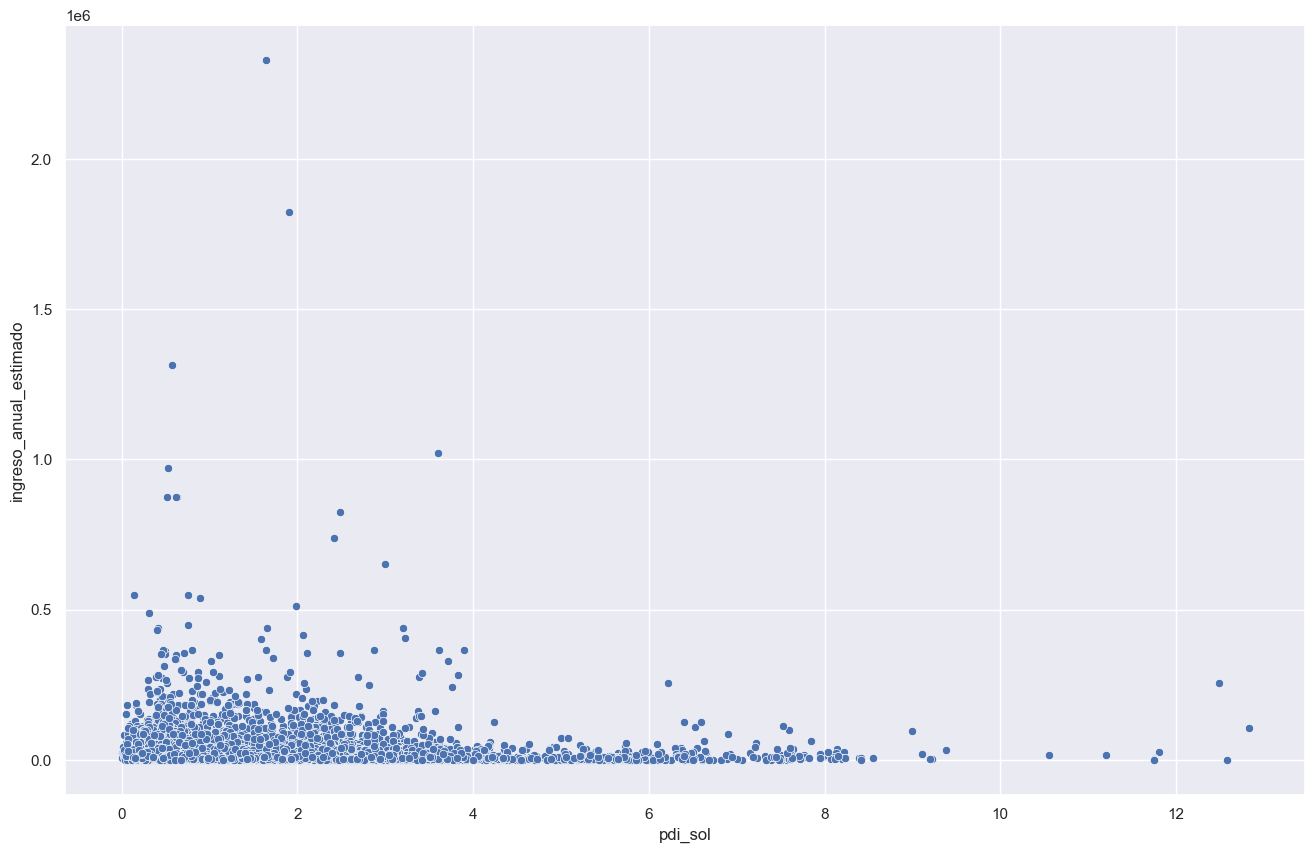

In [25]:
plt.figure(figsize = (16,10))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'ingreso_anual_estimado');

No parece haber una relación tan directa como sería esperable entre la distancia a la Puerta del Sol y el precio de alquiler.

**Insight 4: estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del PdI y por tanto esperablmente tengan un precio de compra menor**

Se analizará visualmente el distrito de San Blas, puesto a que se evidencia ciertas particularidades en torno al ingreso anual que presenta.

In [26]:
import folium

In [27]:
folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

In [28]:
datos = df[df.distrito == 'San Blas - Canillejas'].copy()
datos 

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,ocupacion,ingreso_anual_estimado,bedrooms_discretizadas,accommodates_discretizadas,beds_discretizadas,reviews_discretizadas,m2,precio_compra,roi_en_%,pdi_sol
50,479718,Rental unit in Madrid · ★4.40 · 1 bedroom · 1...,2376402,San Blas - Canillejas,Rosas,40.432020,-3.603530,Private room,68.0,1,1,89,f,2,1.0,1.0,17,4.40,4.94,4.38,2852,San Blas - Canillejas,276,18768.0,01_Una,0-3,0-2,14-72,50,99820.0,18.801843,8.620512
183,758670,Rental unit in Madrid · ★4.73 · 1 bedroom · 1 ...,2536524,San Blas - Canillejas,Arcos,40.426700,-3.616310,Private room,42.0,1,5,0,f,2,1.0,1.0,25,4.73,4.88,4.38,2852,San Blas - Canillejas,365,15330.0,01_Una,0-3,0-2,14-72,50,99820.0,15.357644,7.452229
187,761098,Serviced apartment in Madrid · ★4.45 · 1 bedro...,4012305,San Blas - Canillejas,Rejas,40.446550,-3.581280,Entire home/apt,95.0,1,1,339,f,2,1.0,1.0,109,4.45,4.37,4.46,2852,San Blas - Canillejas,26,2470.0,01_Una,0-3,0-2,73-994,50,99820.0,2.474454,10.853197
208,797030,Rental unit in Madrid · ★4.80 · 2 bedrooms · 2...,4198169,San Blas - Canillejas,Simancas,40.436020,-3.635060,Entire home/apt,66.0,3,1,170,t,3,1.0,2.0,300,4.80,4.74,4.57,2852,San Blas - Canillejas,195,12870.0,01_Una,0-3,0-2,73-994,50,99820.0,12.893208,6.166538
214,814647,Home in Madrid · 1 bedroom,4159117,San Blas - Canillejas,Salvador,40.440300,-3.634640,Private room,30.0,90,1,0,f,2,1.0,1.0,0,NaN,NaN,NaN,2852,San Blas - Canillejas,365,10950.0,01_Una,0-3,0-2,0-13,50,99820.0,10.969746,6.380133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20949,1035644751478049108,Home in Madrid · ★New · 1 bedroom · 1 bed · 1 ...,130325159,San Blas - Canillejas,Rejas,40.444850,-3.591590,Private room,40.0,1,3,245,f,1,1.0,1.0,1,5.00,5.00,5.00,2852,San Blas - Canillejas,120,4800.0,01_Una,0-3,0-2,0-13,50,99820.0,4.808656,9.964786
21154,1039763176614876577,Rental unit in Madrid · ★New · 2 bedrooms · 2 ...,511649938,San Blas - Canillejas,Canillejas,40.437404,-3.611210,Entire home/apt,65.0,1,14,308,f,5,1.0,2.0,0,NaN,NaN,NaN,2852,San Blas - Canillejas,57,3705.0,01_Una,5-16,0-2,0-13,50,99820.0,3.711681,8.132380
21213,1042111863701622730,Rental unit in Madrid · ★New · 2 bedrooms · 3 ...,550105314,San Blas - Canillejas,Rejas,40.443550,-3.586529,Entire home/apt,105.0,1,1,100,f,4,2.0,3.0,0,NaN,NaN,NaN,2852,San Blas - Canillejas,265,27825.0,02_Dos,4,3,0-13,70,139748.0,19.910840,10.329860
21259,1042815915522888314,Rental unit in Madrid · ★New · 1 bedroom · 3 b...,56737955,San Blas - Canillejas,Rejas,40.442808,-3.568677,Entire home/apt,102.0,1,1,26,None,5,2.0,3.0,0,NaN,NaN,NaN,2852,San Blas - Canillejas,339,34578.0,02_Dos,5-16,3,0-13,70,139748.0,24.743109,11.764486


In [33]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

In [30]:
for piso in range(0, len(datos)):
    folium.Marker(location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
                  popup = datos.iloc[piso]['ingreso_anual_estimado']).add_to(mapa)

mapa

In [34]:
datos['ingreso_anual_discretizada'] = pd.qcut(datos['ingreso_anual_estimado'], q = [0, 0.25, 0.5, 0.75, 1],
       labels = ['yellow', 'orange', 'blue', 'red'])

In [35]:
for piso in range(0, len(datos)):
    folium.CircleMarker(location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
                        popup = datos.iloc[piso]['ingreso_anual_estimado'],
                        fill = True,
                        color = datos.iloc[piso]['ingreso_anual_discretizada'],
                        fill_opacity = 1,
                        radius = 5).add_to(mapa)

mapa

**Insight 5: Hay inmuebles cercanos al Wanda Metropolitano que presentan un ingreso anual bastante alto, lo cual puede indicar que existe un potencial para explotar, el factor de los eventos deportivos**